In [1]:
# Imports

import sys
sys.path.append('/usr/local/python')

from collections import OrderedDict
from IPython.display import Image, display
import os
import cv2
import numpy as np
import pickle

In [5]:
# Charset consists of 74 characters + NULL (which is the 75th character)
CHARSET = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789 /-,.:<&()#;'

'''
get_softmax function takes in image name 
returns image and CRNN softmax values for each timestep for the image.
Hint: Get a clear understanding of timestep concept in CRNN
'''
def get_softmax(image_name):
    
    img = cv2.imread(image_name)
    gt = open(image_name + '.txt').readlines()[0]
    logits = pickle.load(open(image_name+".pkl", "rb"))
    return img, gt, logits

"""
process function takes in sotmax value. 
Returns predicted output_text, single confidence score for the image's prediction, character regions
1. Make all changes here to output correct probabilities and regions. 
2. Because of the timestep concept, character repitions can occur (check predictions). 
    Make necessary modifications to fix this.
"""
def process(softmax):
    
    seq_len = softmax.shape[0]
    
    decoded = np.argmax(softmax, axis = 1)

    output_text = []
    output_prob = 1.0
    output_text_regions = []

    for i in range(seq_len):
        # Last character is a NULL token (Last node in softmax layer)
        if decoded[i] == len(CHARSET):
            continue
        output_text.append(CHARSET[decoded[i]])
        
    output_text = ''.join(output_text)

    return output_text, output_prob, output_text_regions

"""
    Input crops are always of height 32px and length X will have X/4 timesteps in the sequence. 0.0001 is epsilon.
"""
def width_to_seq_len(width):
    return int(width / 4.0001)

"""
Preprocess function that was used to process images before feedforwarding through the CRNN net
"""
def preProcessImages(images_test):
    if len(images_test) == 0:
        return []
    
    images_out = []
    for i in range(len(images_test)):
        img = 1.0 * cv2.cvtColor(images_test[i], cv2.COLOR_BGR2GRAY) / 255.0
        
        resize_factor = 1.0 * 32 / img.shape[0]
        out_width = int(img.shape[1] * resize_factor)
        
        # Minimum length required for processing
        if out_width < 41:
            out_width = 41

        img = cv2.resize(img, (out_width, 32))
        images_out.append(img)
    
    return images_out




566


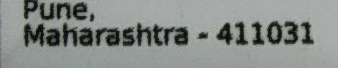

Crop: testing_crops/02LG1LOETLZTUU9N_10.png
Ground Truth: Maharashtra - 411031
Prediction: Maharashttra - 411031


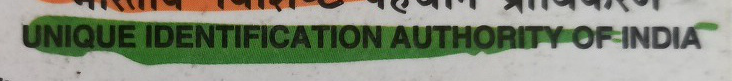

Crop: testing_crops/02SCI7TGBB8R2KV7_1.png
Ground Truth: UNIQUE IDENTIFICATION AUTHORITY OF INDIA
Prediction: UNIIQUE  IDDENTTIFIICATTIONN AAUUTTHHORIITTY OOF  INDIA


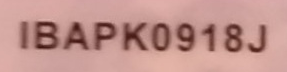

Crop: testing_crops/050TN14UKIIH8YBD_4.png
Ground Truth: IBAPK0918J
Prediction: IBAPK0918J


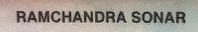

Crop: testing_crops/05ZXR2UZ18SZR7E5_3.png
Ground Truth: RAMCHANDRA SONAR
Prediction: RAMCHHANDRRA SONAR


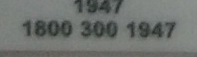

Crop: testing_crops/09CDR6OPN2VMLP7P_19.png
Ground Truth: 1800 300 1947
Prediction: 1800  300 1947


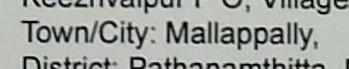

Crop: testing_crops/09WEHLJPO25V57TD_11.png
Ground Truth: Town/City: Mallappally,
Prediction: Town/CCity:  Mallappall),


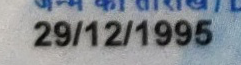

Crop: testing_crops/0AZRYZIU3IXFFKLN_14.png
Ground Truth: 29/12/1995
Prediction: 29/12/1995


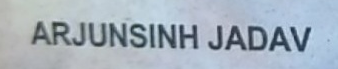

Crop: testing_crops/0BQ5XVZFYVCEUNDN_4.png
Ground Truth: ARJUNSINH JADAV
Prediction: ARJUNSINH  JADAV


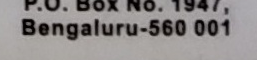

Crop: testing_crops/0DPCGBUT8R5DI6NZ_22.png
Ground Truth: Bengaluru-560 001
Prediction: Bennggalluruu-5560 001


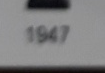

Crop: testing_crops/0FR1KSAZKK8WVCKD_12.png
Ground Truth: 1947
Prediction: 19447


In [6]:
crop_dict = OrderedDict()

# Crops and GT are stored as name.png and name.png.txt in the 'testing_crops' folder. We read these into a dictionary.
crops = ['testing_crops/' + el for el in sorted(os.listdir('testing_crops')) if 'txt' not in el and 'pkl' not in el]
print(len(crops))


# Displaying the details of the first 10 samples
for idx in range(10): 
    display(Image(filename = crops[idx]))
    print('Crop: ' + crops[idx])                        # Crop name
    
    img, gt, softmax = get_softmax(crops[idx])
    print('Ground Truth: ' + gt)                        # Ground truth
    
    outputs, confs, char_regions = process(softmax)
    print('Prediction: ' + outputs)                     # Predicted output  
 
